## データ読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

#出力する行数を設定、省略をなくす
pd.set_option('display.max_rows', 500)

#データをまとめて読み込み、訓練データはtrain
train_files = glob.glob('./data/train/*.csv')
train = pd.DataFrame()
for file in train_files:
    train1 = pd.read_csv(file)
    cat_train = pd.concat([train,train1])
    train = cat_train

train.head()

/var/folders/ks/17djw9_d5r3300_0z8cc33sh0000gn/T/ipykernel_27755/1329853670.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  train1 = pd.read_csv(file)
/var/folders/ks/17djw9_d5r3300_0z8cc33sh0000gn/T/ipykernel_27755/1329853670.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  train1 = pd.read_csv(file)
/var/folders/ks/17djw9_d5r3300_0z8cc33sh0000gn/T/ipykernel_27755/1329853670.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  train1 = pd.read_csv(file)
/var/folders/ks/17djw9_d5r3300_0z8cc33sh0000gn/T/ipykernel_27755/1329853670.py:14: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  train1 = pd.read_csv(file)


,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,40020197,中古マンション等,NaN,40133,福岡県,福岡市中央区,谷,桜坂,7,２ＬＤＫ,...,NaN,NaN,NaN,第１種中高層住居専用地域,60.0,150.0,2021年第2四半期,改装済,NaN,7.041393
1,40031380,中古マンション等,NaN,40137,福岡県,福岡市早良区,西新,西新,4,１Ｋ,...,NaN,NaN,NaN,商業地域,80.0,400.0,2020年第2四半期,未改装,NaN,6.602060
2,40030436,中古マンション等,NaN,40137,福岡県,福岡市早良区,小田部,室見,18,４ＬＤＫ,...,NaN,NaN,NaN,第１種中高層住居専用地域,60.0,150.0,2020年第4四半期,改装済,NaN,7.397940
3,40015295,中古マンション等,NaN,40132,福岡県,福岡市博多区,竹丘町,雑餉隈,5,２ＬＤＫ,...,NaN,NaN,NaN,商業地域,80.0,400.0,2020年第1四半期,未改装,NaN,7.278754
4,40147771,中古マンション等,NaN,40133,福岡県,福岡市中央区,荒戸,大濠公園,6,３ＤＫ,...,NaN,NaN,NaN,商業地域,80.0,400.0,2007年第3四半期,未改装,NaN,6.929419


## 欠損値多いカラム削除

In [2]:
#目的変数
"""
'取引価格（総額）_log'
"""

#説明変数
"""
'ID', '市区町村コード', '都道府県名', '地区名', '最寄駅：名称', '最寄駅：距離（分）', '間取り', '面積（㎡）',
        '建築年', '建物の構造', '用途', '今後の利用目的', '都市計画', '建ぺい率（％）', '容積率（％）', '改装'
"""

###欠損値の削除###
class Delete_Null_Data():
    """
    欠損率が高いcolumnを削除するclass
    """
    
    def __init__(self,df):
        self.df = df
        
    #nullのカウントとnullの%のDataframeを返すメソッド
    def null_counts(self):
        null_counts_df = self.df
        null_counts_df = pd.DataFrame(null_counts_df.isnull().sum(),columns=['null_counts'])
        null_counts_df['null_par'] = null_counts_df['null_counts']/len(self.df)
        return null_counts_df
    
    #nullの多いcolumnを削除するメソッド引数にnullの%を指定　１００％→１　５０％→0.5
    def delete_null_columns(self,null_par=0.9):
        df = self.null_counts()
        re_df = df[df['null_par']>null_par]
        cols = re_df.index.tolist()
        delete_df = self.df.drop(labels=cols,axis=1)
        
        return delete_df


In [3]:
#インスタンス化して訓練データを更新する
Adj_Data=Delete_Null_Data(train)
train=Adj_Data.delete_null_columns()
train.shape

(722574, 20)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722574 entries, 0 to 37378
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            722574 non-null  int64  
 1   種類            722574 non-null  object 
 2   市区町村コード       722574 non-null  int64  
 3   都道府県名         722574 non-null  object 
 4   市区町村名         722574 non-null  object 
 5   地区名           721906 non-null  object 
 6   最寄駅：名称        719843 non-null  object 
 7   最寄駅：距離（分）     699417 non-null  object 
 8   間取り           696682 non-null  object 
 9   面積（㎡）         722574 non-null  object 
 10  建築年           701593 non-null  object 
 11  建物の構造         703422 non-null  object 
 12  用途            651713 non-null  object 
 13  今後の利用目的       356654 non-null  object 
 14  都市計画          702756 non-null  object 
 15  建ぺい率（％）       698413 non-null  float64
 16  容積率（％）        698413 non-null  float64
 17  取引時点          722574 non-null  object 
 18  改装   

## データ前処理

In [7]:
'''
---データの前処理を施すメソッド---
名前：　preprocess
引数：　データフレーム
戻り値：　前処理をしたデータフレーム
'''

def preprocess(df):
    #欠損値補完で使うrandomをインポート
    import random
    
    #前処理を施す前のデータを確認
    print('==========Before preprocessing:==========',df.info())
    
    #種類, 市区町村名は削除------------------------------------<
    df=df.drop(['種類','市区町村名'], axis=1)
    
    #カテゴリ変数化------------------------------------<
    use_columns=["都道府県名", "地区名", "最寄駅：名称", "間取り", "建物の構造", "用途", "今後の利用目的", "都市計画", "改装"]
    for col in use_columns:
        df[col] = df[col].astype("category")
    
    
    #最寄駅：距離（分） object型→int型に変換------------------------------------<
    #時間がわからない部分の補完、欠損値は10で補完
    re={
        '30分?60分':'45', 
        '1H30?2H':'105', 
        '1H?1H30':'75', 
        '2H?':'120'
    }
    df['最寄駅：距離（分）']=df['最寄駅：距離（分）'].replace(re)
    df['最寄駅：距離（分）']=df['最寄駅：距離（分）'].fillna('10')
    df['最寄駅：距離（分）']=df['最寄駅：距離（分）'].astype(int)
    
    
    #面積（㎡） object型→int型(単位なし)に変換------------------------------------<
    #面積の欠損値はなし、'2000㎡以上'は'2000'で補完
    #df['面積（㎡）']=df['面積（㎡）'].replace('2000㎡以上','2000')
    #1000以上も削ってもいい
    df = df[df['面積（㎡）'] != '2000㎡以上']
    df['面積（㎡）']=df['面積（㎡）'].astype(int)
    df=df[df['面積（㎡）']<1000]
    
    #建築年 object型→int型(築年数)に変換------------------------------------<
    #欠損値を補完, nanのままだとうまくいかないので文字列でnullと入れておく
    df['建築年']=df['建築年'].fillna('null')
    
    l_k=[]
    now=2022
    y=df['建築年']
    
    for i in range(0,len(y),1):        
        #年号が令和、令和2年=2018+2=2020年
        if y.iloc[i][:2]=='令和':
            if y.iloc[i][3]=='年':
                year=now-(2018+int(y.iloc[i][2]))
            else:
                year=now-(2018+int(y.iloc[i][2])*10+int(y.iloc[i][3])) 
            l_k.append(year)

        
        #年号が平成、平成2年=1988+2=1991年
        elif y.iloc[i][:2]=='平成':
            if y.iloc[i][3]=='年':
                year=now-(1988+int(y.iloc[i][2]))
            else:
                year=now-(1988+int(y.iloc[i][2])*10+int(y.iloc[i][3])) 
            l_k.append(year)
            

        #年号が昭和、昭和2年=1925+2=1927年
        elif y.iloc[i][:2]=='昭和':
            if y.iloc[i][3]=='年':
                year=now-(1925+int(y.iloc[i][2]))
            else:
                year=now-(1925+int(y.iloc[i][2])*10+int(y.iloc[i][3])) 
            l_k.append(year)

        #年号が戦前、1868年から1945年の値をランダムに格納
        #1945年に終戦
        elif y.iloc[i][:2]=='戦前':
            year=now-random.randint(1868, 1945)
            l_k.append(year)

        #年号が欠損、1868年から2021年の値をランダムに格納
        else:
            #year=now-random.randint(1868, 2021)
            year=now-np.median(l_k)
            l_k.append(year)
    #リストを代入       
    df['建築年']=l_k
    
    #取引時点 object型→int型に変換------------------------------------<
    l_t=[]

    y1=df['取引時点']
    
    for i in range(0,len(y1),1):        
        #第1四半期
        if y1.iloc[i][6]=='1':
            torihiki=int(y1.iloc[i][:4])+0.25
            l_t.append(torihiki)

        #第2四半期
        elif y1.iloc[i][6]=='2':
            torihiki=int(y1.iloc[i][:4])+0.50
            l_t.append(torihiki)
            
        #第3四半期
        elif y1.iloc[i][6]=='3':
            torihiki=int(y1.iloc[i][:4])+0.50
            l_t.append(torihiki)
            
        #第4四半期
        else:
            torihiki=int(y1.iloc[i][:4])+0.99
            l_t.append(torihiki)
    #リストを代入        
    df['取引時点']=l_t
    
    #前処理を施した後のデータを確認
    print('==========After preprocessing:==========',df.info())
    
    
    #前処理後のデータを返す
    return df

In [8]:
#前処理した結果を更新して訓練データとして扱う
train=preprocess(train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722574 entries, 0 to 37378
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            722574 non-null  int64  
 1   種類            722574 non-null  object 
 2   市区町村コード       722574 non-null  int64  
 3   都道府県名         722574 non-null  object 
 4   市区町村名         722574 non-null  object 
 5   地区名           721906 non-null  object 
 6   最寄駅：名称        719843 non-null  object 
 7   最寄駅：距離（分）     699417 non-null  object 
 8   間取り           696682 non-null  object 
 9   面積（㎡）         722574 non-null  object 
 10  建築年           701593 non-null  object 
 11  建物の構造         703422 non-null  object 
 12  用途            651713 non-null  object 
 13  今後の利用目的       356654 non-null  object 
 14  都市計画          702756 non-null  object 
 15  建ぺい率（％）       698413 non-null  float64
 16  容積率（％）        698413 non-null  float64
 17  取引時点          722574 non-null  object 
 18  改装   

In [48]:
#ランダムフォレストはカテゴリ変数を扱えないので、一意的な数字に変換
import category_encoders as ce

def original_enc(df):
    list_cols=['都道府県名', '地区名', '最寄駅：名称', '間取り', '建物の構造', '用途', '今後の利用目的', '都市計画', '改装']
    drop_null_cols=['建ぺい率（％）', '容積率（％）']
    #オリジナルエンコーダーのインスタンス生成
    df_cate_encoder=ce.OrdinalEncoder(cols=list_cols, drop_invariant=True)
    
    #一意的な数字に変換したカラムをencoded_listに格納
    encoded_list=df_cate_encoder.fit_transform(df[list_cols])
    
    #元のカラムを削除
    df=df.drop(list_cols, axis=1)
    df=df.drop(drop_null_cols, axis=1)
    #変換したものを結合
    df=pd.concat([df, encoded_list], axis=1)
    
    return df

encoded=original_enc(train)

# X=encoded.drop('取引価格（総額）_log', axis=1)
# y=encoded['取引価格（総額）_log']

In [49]:
encoded

,ID,市区町村コード,最寄駅：距離（分）,面積（㎡）,建築年,取引時点,取引価格（総額）_log,都道府県名,地区名,最寄駅：名称,間取り,建物の構造,用途,今後の利用目的,都市計画,改装
0,40020197,40133,7,45,34.0,2021.50,7.041393,1,1,1,1,1,1,1,1,1
1,40031380,40137,4,15,33.0,2020.50,6.602060,1,2,2,2,2,1,1,2,2
2,40030436,40137,18,80,34.0,2020.99,7.397940,1,3,3,3,1,1,1,1,1
3,40015295,40132,5,60,16.0,2020.25,7.278754,1,4,4,1,1,1,1,2,2
4,40147771,40133,6,60,35.0,2007.50,6.929419,1,5,5,4,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37374,12086403,12203,10,70,42.0,2009.99,7.342423,47,11868,3762,5,2,1,2,4,1
37375,12156949,12217,16,70,19.0,2012.50,7.230449,47,11764,3690,5,1,1,2,11,2
37376,12142872,12219,6,80,16.0,2014.50,7.380211,47,2054,3780,3,1,1,1,5,2
37377,12088489,12204,45,45,54.0,2012.50,6.770852,47,11906,3726,5,1,1,2,4,2


## モデルの実装 
* tensorflow回帰

In [50]:
#必要なライブラリのインポート
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, cross_validate

import tensorflow as tf
from tensorflow import keras 

import lightgbm as lgb
import optuna
import time

# #説明変数 ： X
# X=train.drop('取引価格（総額）_log', axis=1)
# #目的変数 : y、logを消すと幅が大きくなる
# y=train['取引価格（総額）_log']
X=encoded.drop(['取引価格（総額）_log','ID'], axis=1)
y=encoded['取引価格（総額）_log']

#訓練データと検証データに分割, 7:3
train_val_X, test_X, train_val_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(train_val_X, train_val_y, test_size=0.2, random_state=1)


In [51]:
train_X

,市区町村コード,最寄駅：距離（分）,面積（㎡）,建築年,取引時点,都道府県名,地区名,最寄駅：名称,間取り,建物の構造,用途,今後の利用目的,都市計画,改装
52078,27301,26,55,45.0,2018.25,27,5820,1497,1,1,2,1,10,2
45507,14205,6,85,12.0,2010.25,36,8320,2260,3,1,1,2,2,2
835,14214,9,70,15.0,2017.25,36,3498,2180,8,1,1,1,5,2
159282,13104,5,25,2.0,2020.99,44,10355,3154,2,1,1,1,8,2
3020,29201,12,65,26.0,2013.50,33,7178,1954,5,1,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,15103,9,25,23.0,2021.25,35,879,2147,2,2,2,1,2,2
173819,13111,6,25,7.0,2015.50,44,2873,3445,7,1,1,1,5,2
31254,11221,10,65,41.0,2007.50,42,10683,2946,5,2,1,2,1,2
29284,23230,75,75,27.0,2008.50,10,1855,401,1,1,1,2,1,2


In [73]:
def build_model():
    model = keras.Sequential([
                                                    keras.layers.Dense(128, activation=tf.nn.relu,input_shape=(train_X.shape[1],)),
                                                    keras.layers.Dense(128, activation=tf.nn.relu),
                                                    keras.layers.Dense(1)
                                                    ])
    return model
 
model = build_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1920      
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18,561
Trainable params: 18,561
Non-trainable params: 0
_________________________________________________________________


In [74]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='mean_absolute_error',optimizer=Adam(learning_rate=0.01),metrics=['mae'])

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

es_cb=EarlyStopping(
    monitor='val_mae',
    patience=10,
    restore_best_weights=True
)

history = model.fit(train_X, train_y, epochs=100,
                    validation_split=0.2,
                    callbacks=es_cb)

Epoch 1/100
10116/10116 [==============================] - 28s 3ms/step - loss: 3.2268 - mae: 3.2268 - val_loss: 0.2282 - val_mae: 0.2282
Epoch 2/100
10116/10116 [==============================] - 28s 3ms/step - loss: 0.2571 - mae: 0.2571 - val_loss: 0.2740 - val_mae: 0.2740
Epoch 3/100
10116/10116 [==============================] - 29s 3ms/step - loss: 0.2716 - mae: 0.2716 - val_loss: 0.2725 - val_mae: 0.2725
Epoch 4/100
10116/10116 [==============================] - 27s 3ms/step - loss: 0.2705 - mae: 0.2705 - val_loss: 0.2695 - val_mae: 0.2695
Epoch 5/100
10116/10116 [==============================] - 29s 3ms/step - loss: 0.2701 - mae: 0.2701 - val_loss: 0.2697 - val_mae: 0.2697
Epoch 6/100
10116/10116 [==============================] - 27s 3ms/step - loss: 0.2702 - mae: 0.2702 - val_loss: 0.2689 - val_mae: 0.2689
Epoch 7/100
10116/10116 [==============================] - 30s 3ms/step - loss: 0.2701 - mae: 0.2701 - val_loss: 0.2693 - val_mae: 0.2693
Epoch 8/100
10116/10116 [=========

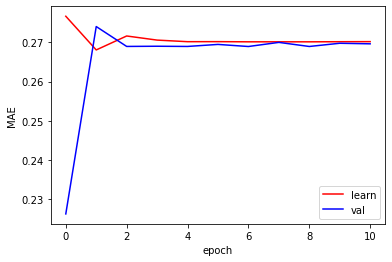

In [70]:
#学習曲線
vars(history)

#学習データでの損失
history.history['loss']

plt.plot(history.history['loss'], label='learn', c='red')
plt.plot(history.history['val_loss'], label='val', c='blue')
plt.xlabel('epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [72]:
history.history

{'loss': [0.27665263414382935,
  0.2680571973323822,
  0.2716178297996521,
  0.2705666124820709,
  0.27016162872314453,
  0.27017298340797424,
  0.27012959122657776,
  0.27013149857521057,
  0.2701272964477539,
  0.27015507221221924,
  0.27017733454704285],
 'mae': [0.27665263414382935,
  0.2680571973323822,
  0.2716178297996521,
  0.2705666124820709,
  0.27016162872314453,
  0.27017298340797424,
  0.27012959122657776,
  0.27013149857521057,
  0.2701272964477539,
  0.27015507221221924,
  0.27017733454704285],
 'val_loss': [0.22622762620449066,
  0.27402371168136597,
  0.2689518332481384,
  0.26900163292884827,
  0.2689485251903534,
  0.2694653570652008,
  0.26893237233161926,
  0.26998206973075867,
  0.2689402997493744,
  0.2697608172893524,
  0.2696179151535034],
 'val_mae': [0.22622762620449066,
  0.27402371168136597,
  0.2689518332481384,
  0.26900163292884827,
  0.2689485251903534,
  0.2694653570652008,
  0.26893237233161926,
  0.26998206973075867,
  0.2689402997493744,
  0.2697608